In [ ]:
# Start by downloading the necessary data. You will need to have setup your Kaggle API access
# https://www.kaggle.com/docs/api#interacting-with-datasets
# Alternatively, download the data through the web ui and put it into the root folder into ./data
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste
!mkdir ../data && unzip sea-animals-image-dataste -d ../data && rm -f sea-animals-image-dataste.zip

In [16]:
# System libraries
from pathlib import Path
import os.path

# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [17]:
image_dir = Path("../data")

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.PNG'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)
image_df.head()

,Filepath,Label
0,../data/Corals/4306503079_a38034b67d_o.jpg,Corals
1,../data/Corals/29588052888_09f27ff125_o.jpg,Corals
2,../data/Corals/4562957248_f41dbb8071_o.jpg,Corals
3,../data/Corals/8333266856_3e51866e00_o.jpg,Corals
4,../data/Corals/4391260135_0fe6997ab9_o.jpg,Corals


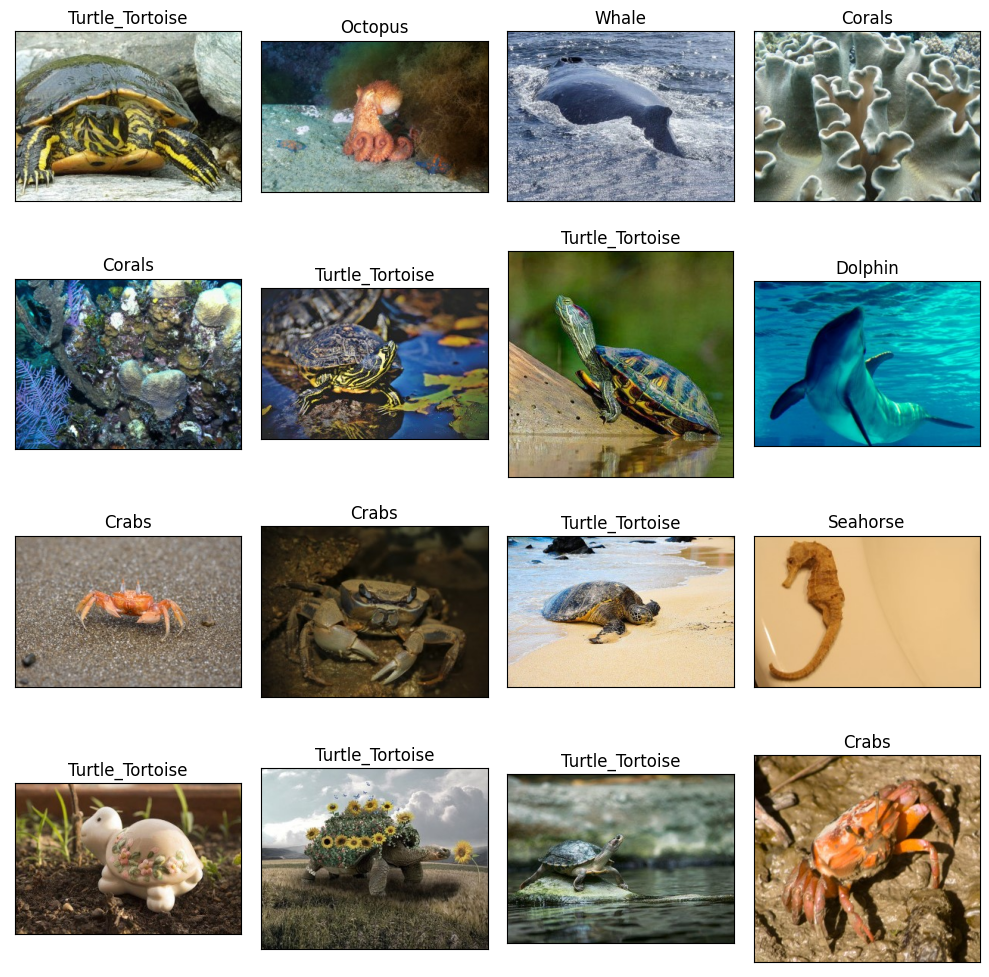

In [18]:
# First visualisation of random 16 images
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
    
plt.tight_layout()
plt.show()